# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [519]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [520]:
# Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

### **1.1 Load the Data**

In [522]:
# Load the dataset
emp_df = pd.read_csv('Employee_data.csv')

In [523]:
# Check the first few entries
emp_df.head(5)

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [524]:
# Inspect the shape of the dataset
emp_df.shape

(74610, 24)

In [525]:
# Inspect the different columns in the dataset
emp_df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [527]:
# Check the summary of the dataset
emp_df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [529]:
# Check the info to see the types of the feature variables and the null values present
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [533]:
# Check the number of missing values in each column
missing_values_count = emp_df.isnull().sum()
print("Number of missing values:")
print(missing_values_count)

Number of missing values:
Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [535]:
# Check the percentage of missing values in each column
missing_values_percent = (missing_values_count / len(emp_df)) * 100
print("Percentage of missing values in each column:")
print(missing_values_percent)  

Percentage of missing values in each column:
Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [537]:
# Handle the missing value rows in the column
emp_df_cleaned = emp_df.dropna()
emp_df_cleaned

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0             8410   31    Male                19   Education            5390   
1            64756   59  Female                 4       Media            5534   
2            30257   24  Female                10  Healthcare            8159   
3            65791   36  Female                 7   Education            3989   
4            65026   56    Male                41   Education            4821   
...            ...  ...     ...               ...         ...             ...   
74604        11030   57    Male                12  Technology            8438   
74605        13450   44  Female                20  Healthcare            7578   
74607        36968   28  Female                 3  Technology            9763   
74608        24276   37    Male                 3   Education            3644   
74609         9839   38    Male                28       Media            6172   

      Work-Life Balance Job Satisfaction Performance Rating  \
0             Excellent           Medium            Average   
1                  Poor             High                Low   
2                  Good             High                Low   
3                  Good             High               High   
4                  Fair        Very High            Average   
...                 ...              ...                ...   
74604         Excellent           Medium               High   
74605              Fair           Medium                Low   
74607              Poor              Low            Average   
74608              Fair             High            Average   
74609              Good             High               High   

       Number of Promotions  ... Number of Dependents  Job Level Company Size  \
0                         2  ...                    0        Mid       Medium   
1                         3  ...                    3        Mid       Medium   
2                         0  ...                    3        Mid       Medium   
3                         1  ...                    2        Mid        Small   
4                         0  ...                    0     Senior       Medium   
...                     ...  ...                  ...        ...          ...   
74604                     0  ...                    2        Mid       Medium   
74605                     2  ...                    3        Mid        Large   
74607                     0  ...                    3     Senior        Small   
74608                     2  ...                    4      Entry       Medium   
74609                     0  ...                    2        Mid       Medium   

      Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                           89.0           No                       No   
1                           21.0           No                       No   
2                           74.0           No                       No   
3                           50.0          Yes                       No   
4                           68.0           No                       No   
...                          ...          ...                      ...   
74604                       27.0           No                       No   
74605                       52.0           No                       No   
74607                       67.0           No                       No   
74608                       16.0           No                       No   
74609                       84.0           No                       No   

      Innovation Opportunities  Company Reputation Employee Recognition  \
0                           No           Excellent               Medium   
1                           No                Fair                  Low   
2                           No                Poor                  Low   
3                           No                Good               Medium   
4                           No          

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [539]:
# Check the percentage of remaining data after missing values are removed
percentage = (len(emp_df_cleaned) / len(emp_df)) * 100
print("Percentage remaining after dropping missing values:")
print(percentage)

Percentage remaining after dropping missing values:
94.67229593888219


#### 1. Since about 94.672% of the data is complete, we are only losing about 5.328%, which is acceptable.

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [543]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def categorical_uniques(df):
    print("Unique values in categorical columns:\n")
    categorical_columns = df.select_dtypes(include='object').columns
    for col in categorical_columns:
        unique_vals = df[col].unique()
        print(f"{col} ({len(unique_vals)} unique values): {unique_vals}\n")

In [544]:
# Check the data
categorical_uniques(emp_df_cleaned)

Unique values in categorical columns:

Gender (2 unique values): ['Male' 'Female']

Job Role (5 unique values): ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Work-Life Balance (4 unique values): ['Excellent' 'Poor' 'Good' 'Fair']

Job Satisfaction (4 unique values): ['Medium' 'High' 'Very High' 'Low']

Performance Rating (4 unique values): ['Average' 'Low' 'High' 'Below Average']

Overtime (2 unique values): ['No' 'Yes']

Education Level (5 unique values): ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Marital Status (3 unique values): ['Married' 'Divorced' 'Single']

Job Level (3 unique values): ['Mid' 'Senior' 'Entry']

Company Size (3 unique values): ['Medium' 'Small' 'Large']

Remote Work (2 unique values): ['No' 'Yes']

Leadership Opportunities (2 unique values): ['No' 'Yes']

Innovation Opportunities (2 unique values): ['No' 'Yes']

Company Reputation (4 unique values): ['Excellent' 'Fair' 'Poor' 'Good']

Employee Recognition (4 

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [546]:
# Drop redundant columns which are not required for modelling
# Finding the columns to drop 
X = emp_df_cleaned.drop(columns=['Attrition', 'Employee ID'])     ## 'Attrition' is target column and 'Employee ID' is a redundant columns by over looking. 
y = emp_df_cleaned['Attrition'].apply(lambda x: 1 if x == 'Left' else 0)

# Correlation Analysis (Numerical)
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = X[numerical_columns].corr()

print("Correlation Matrix:\n", correlation_matrix)

# Identify features with high correlation (> 0.7)
highly_correlated_features = {
    correlation_matrix.columns[i]
    for i in range(len(correlation_matrix.columns))
    for j in range(i)
    if abs(correlation_matrix.iloc[i, j]) > 0.7
}

print("\nHighly Correlated Features:", highly_correlated_features)

# Chi-Square Test (Categorical)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
chi_square_results = {}

for col in categorical_columns:
    contingency = pd.crosstab(X[col], y)
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    chi_square_results[col] = {'Chi2': chi2_stat, 'P-Value': p_val}

print("\nChi-Square Test Results:\n", pd.DataFrame(chi_square_results).T)

Correlation Matrix:
                                  Age  Years at Company  Monthly Income  \
Age                         1.000000          0.536662       -0.004119   
Years at Company            0.536662          1.000000       -0.008100   
Monthly Income             -0.004119         -0.008100        1.000000   
Number of Promotions        0.000386          0.001182        0.001976   
Distance from Home         -0.005318         -0.005371       -0.001872   
Number of Dependents        0.002780          0.003972       -0.002343   
Company Tenure (In Months)  0.236282          0.442670       -0.011297   

                            Number of Promotions  Distance from Home  \
Age                                     0.000386           -0.005318   
Years at Company                        0.001182           -0.005371   
Monthly Income                          0.001976           -0.001872   
Number of Promotions                    1.000000           -0.007478   
Distance from Home        

#### 2. Calculating highly coorelated features (>0.7) for numerical columns, which come to be a null set and calculating Chi-square Test for categorical columns, which shows column 'Employee Recognition' to have p value high (>0.05). We come to conclusion that we have two redundant columns 'Employee ID' and 'Employee Recognition'.

In [548]:
# Remove 'Employee ID' and 'Employee Recognition' columns
columns_to_remove = ['Employee ID', 'Employee Recognition']
emp_df_cleaned = emp_df_cleaned.drop(columns=columns_to_remove)

In [549]:
# Check first few rows of data
emp_df_cleaned.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Marital Status Number of Dependents Job Level  Company Size  \
0       No  ...         Married                    0       Mid        Medium   
1       No  ...        Divorced                    3       Mid        Medium   
2       No  ...         Married                    3       Mid        Medium   
3       No  ...          Single                    2       Mid         Small   
4      Yes  ...        Divorced                    0    Senior        Medium   

  Company Tenure (In Months) Remote Work  Leadership Opportunities  \
0                       89.0          No                        No   
1                       21.0          No                        No   
2                       74.0          No                        No   
3                       50.0         Yes                        No   
4                       68.0          No                        No   

  Innovation Opportunities Company Reputation Attrition  
0                       No          Excellent    Stayed  
1                       No               Fair    Stayed  
2                       No               Poor    Stayed  
3                       No               Good    Stayed  
4                       No               Fair    Stayed  

[5 rows x 22 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [552]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [554]:
# Put all the feature variables in X
X = emp_df_cleaned.drop(columns=['Attrition'])
# Put the target variable in y
y = emp_df_cleaned['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [556]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)

# Verify the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 49444
Validation set size: 21191


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [561]:
# Select numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>


Descriptive Statistics for Age:
count    49444.000000
mean        38.512944
std         12.113144
min         18.000000
25%         28.000000
50%         38.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64



Descriptive Statistics for Years at Company:
count    49444.000000
mean        15.712847
std         11.235010
min          1.000000
25%          7.000000
50%         13.000000
75%         23.000000
max         51.000000
Name: Years at Company, dtype: float64



Descriptive Statistics for Monthly Income:
count    49444.000000
mean      7341.525140
std       2515.178635
min       1253.000000
25%       5661.000000
50%       7354.000000
75%       8886.000000
max      50030.000000
Name: Monthly Income, dtype: float64



Descriptive Statistics for Number of Promotions:
count    49444.000000
mean         0.831001
std          0.997700
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          4.000000
Name: Number of Promotions, dtype: float64


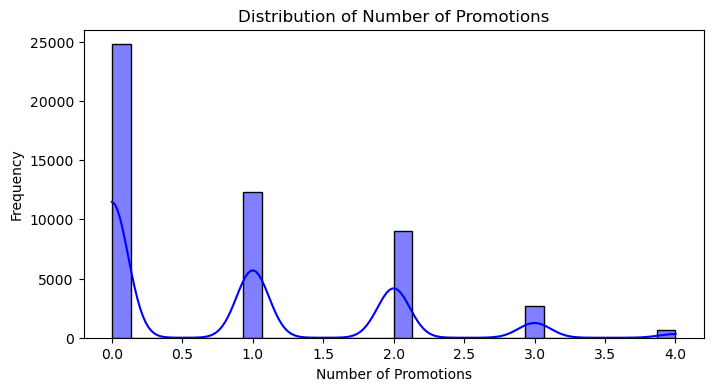


Descriptive Statistics for Distance from Home:
count    49444.000000
mean        50.030560
std         28.560648
min          1.000000
25%         25.000000
50%         50.000000
75%         75.000000
max         99.000000
Name: Distance from Home, dtype: float64


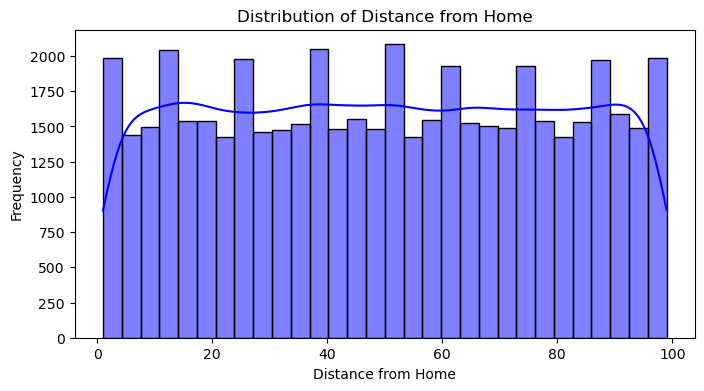


Descriptive Statistics for Number of Dependents:
count    49444.000000
mean         1.657774
std          1.577224
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         15.000000
Name: Number of Dependents, dtype: float64


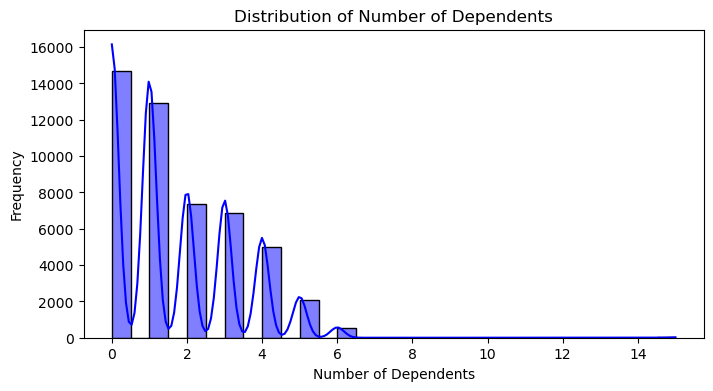


Descriptive Statistics for Company Tenure (In Months):
count    49444.000000
mean        55.593560
std         25.358173
min          2.000000
25%         36.000000
50%         56.000000
75%         75.000000
max        128.000000
Name: Company Tenure (In Months), dtype: float64


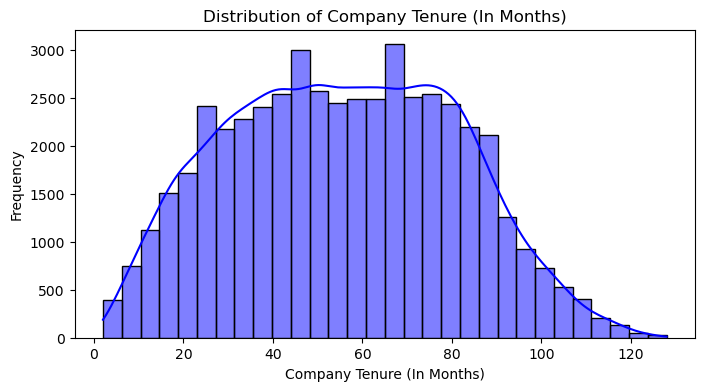

In [563]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Loop through each numerical column
for col in numerical_cols:
    # Print descriptive statistics
    print(f"\nDescriptive Statistics for {col}:")
    print(X_train[col].describe())
    
    # Plot the distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig('plot image 1.png')
    plt.show()

#### 3. Univariate analysis of all numerical columns shows data to be fit for training, as no outliers is present.

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

Correlation Matrix of Numerical Columns:
                                 Age  Years at Company  Monthly Income  \
Age                         1.000000          0.539685       -0.007214   
Years at Company            0.539685          1.000000       -0.010010   
Monthly Income             -0.007214         -0.010010        1.000000   
Number of Promotions        0.001471          0.001215       -0.001835   
Distance from Home         -0.004621         -0.001577       -0.003485   
Number of Dependents        0.002179          0.000915       -0.006198   
Company Tenure (In Months)  0.233375          0.441171       -0.012475   

                            Number of Promotions  Distance from Home  \
Age                                     0.001471           -0.004621   
Years at Company                        0.001215           -0.001577   
Monthly Income                         -0.001835           -0.003485   
Number of Promotions                    1.000000           -0.011246   
Distan

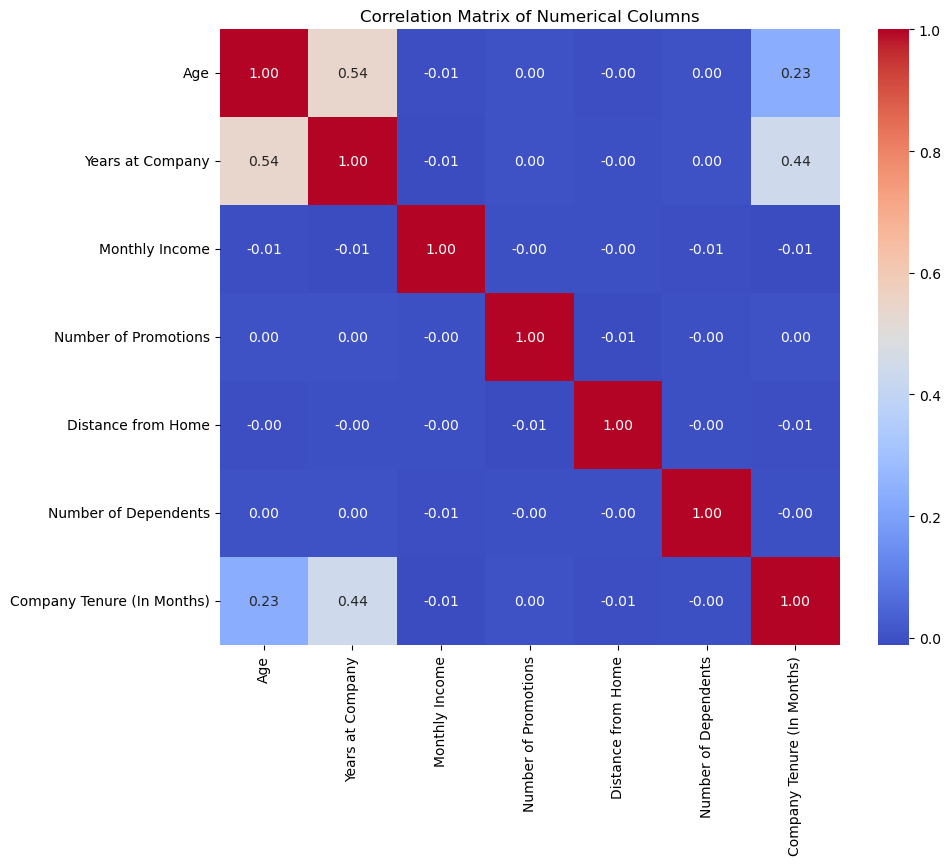

In [567]:
# Create correlation matrix for numerical columns
correlation_matrix = X_train[numerical_cols].corr()
print("Correlation Matrix of Numerical Columns:")
print(correlation_matrix)

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Numerical Columns")
plt.savefig('plot image 2.png')
plt.show()

#### 4. Coorelation Matrix shows no high coorelated data, so fit for training.

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

In [571]:
# Plot a bar chart to check class balance
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette='Set1')
plt.title("Class Balance in Training Set")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No Attrition (0)', 'Attrition (1)'])  # Label the classes
plt.savefig('plot image 3.png')
plt.show()

#### 5. Class balance shows data are balanced, thus good for training as model learned will not be overfitting.

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

Chi-square Test for Gender and Attrition:
Chi2 Stat: 493.32457593681806, p-value: 2.694183689296059e-109
Degrees of Freedom: 1
Expected Frequencies:
[[10730.28320929 11690.71679071]
 [12932.71679071 14090.28320929]]
--------------------------------------------------


Chi-square Test for Job Role and Attrition:
Chi2 Stat: 10.108455356884317, p-value: 0.03863986124492234
Degrees of Freedom: 4
Expected Frequencies:
[[4935.61441226 5377.38558774]
 [3334.27960925 3632.72039075]
 [5407.49609659 5891.50390341]
 [3815.73293018 4157.26706982]
 [6169.8769517  6722.1230483 ]]
--------------------------------------------------


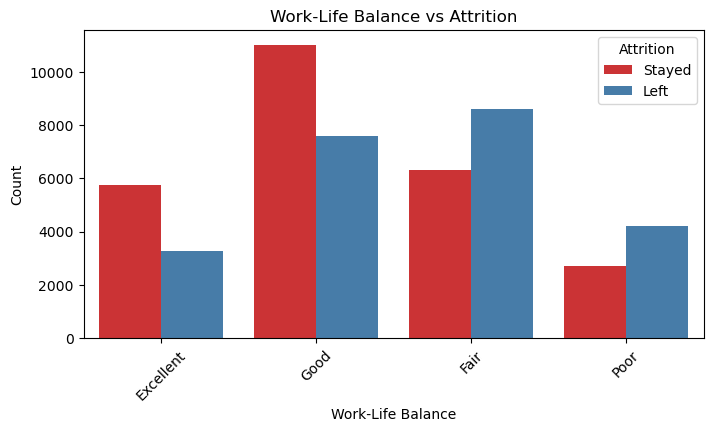

Chi-square Test for Work-Life Balance and Attrition:
Chi2 Stat: 1912.285132150513, p-value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
[[4310.10796052 4695.89203948]
 [7128.95493892 7767.04506108]
 [8912.15083731 9709.84916269]
 [3311.78626325 3608.21373675]]
--------------------------------------------------


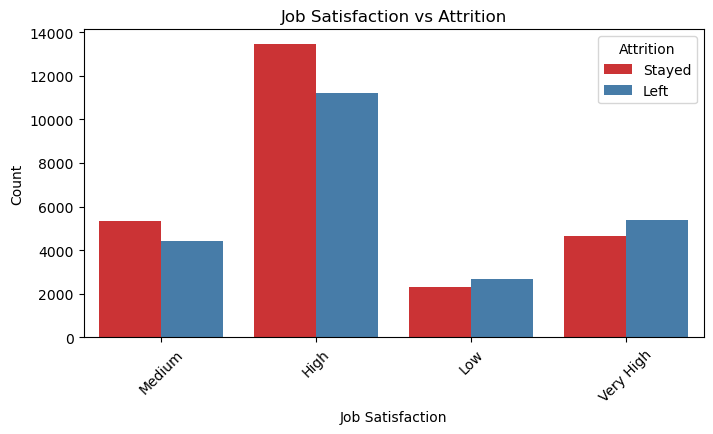

Chi-square Test for Job Satisfaction and Attrition:
Chi2 Stat: 268.3444829352738, p-value: 7.040958320253243e-58
Degrees of Freedom: 3
Expected Frequencies:
[[11801.82792654 12858.17207346]
 [ 2383.81609498  2597.18390502]
 [ 4670.9586603   5089.0413397 ]
 [ 4806.39731818  5236.60268182]]
--------------------------------------------------


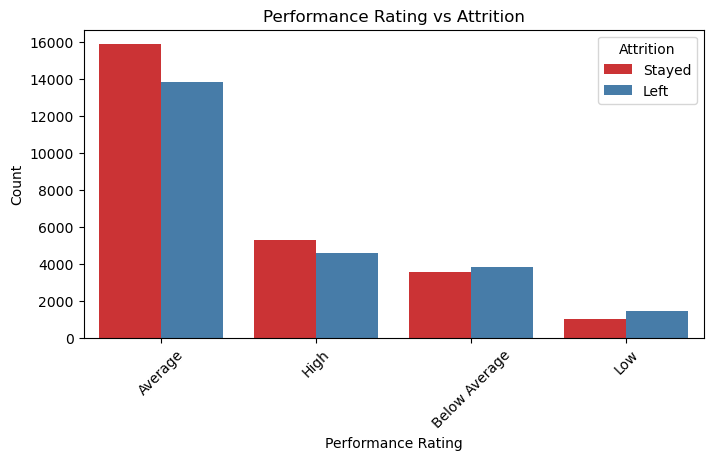

Chi-square Test for Performance Rating and Attrition:
Chi2 Stat: 173.81125153449233, p-value: 1.9134747220136216e-37
Degrees of Freedom: 3
Expected Frequencies:
[[14214.35893132 15486.64106868]
 [ 3540.06979613  3856.93020387]
 [ 4730.78138905  5154.21861095]
 [ 1177.7898835   1283.2101165 ]]
--------------------------------------------------


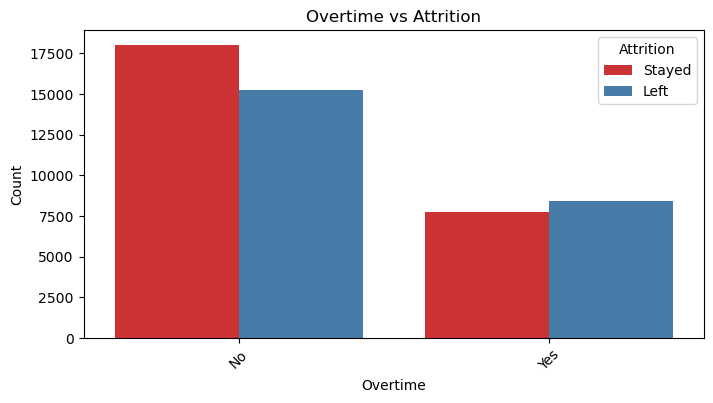

Chi-square Test for Overtime and Attrition:
Chi2 Stat: 162.81455554307814, p-value: 2.7462133563023037e-37
Degrees of Freedom: 1
Expected Frequencies:
[[15920.50315508 17345.49684492]
 [ 7742.49684492  8435.50315508]]
--------------------------------------------------


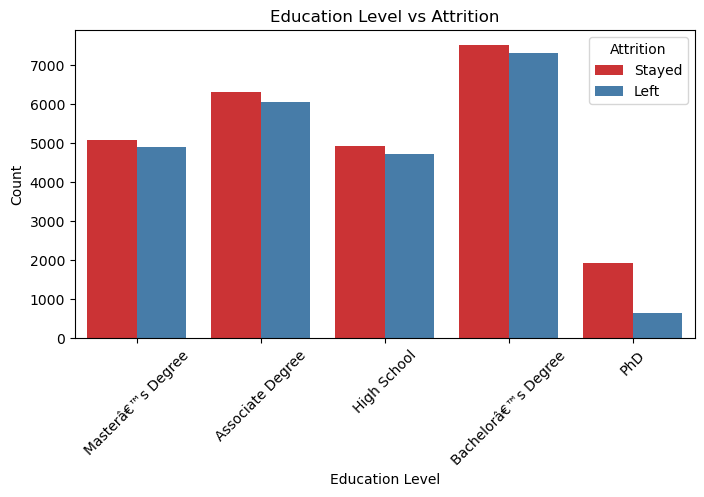

Chi-square Test for Education Level and Attrition:
Chi2 Stat: 549.4346352130176, p-value: 1.3559663900036455e-117
Degrees of Freedom: 4
Expected Frequencies:
[[5926.75738209 6457.24261791]
 [7111.24741121 7747.75258879]
 [4619.27182267 5032.72817733]
 [4774.8109174  5202.1890826 ]
 [1230.91246663 1341.08753337]]
--------------------------------------------------


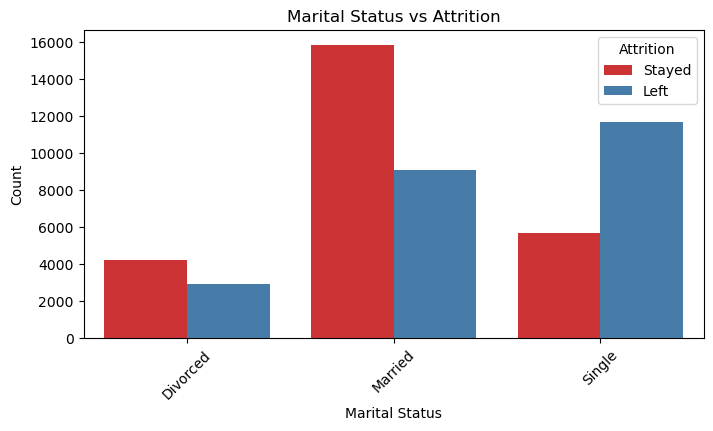

Chi-square Test for Marital Status and Attrition:
Chi2 Stat: 4037.9953755267466, p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[ 3432.86746622  3740.13253378]
 [11922.43054769 12989.56945231]
 [ 8307.70198609  9051.29801391]]
--------------------------------------------------


Chi-square Test for Job Level and Attrition:
Chi2 Stat: 5122.04281802549, p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[ 9447.20532319 10292.79467681]
 [ 9433.80503196 10278.19496804]
 [ 4781.98964485  5210.01035515]]
--------------------------------------------------


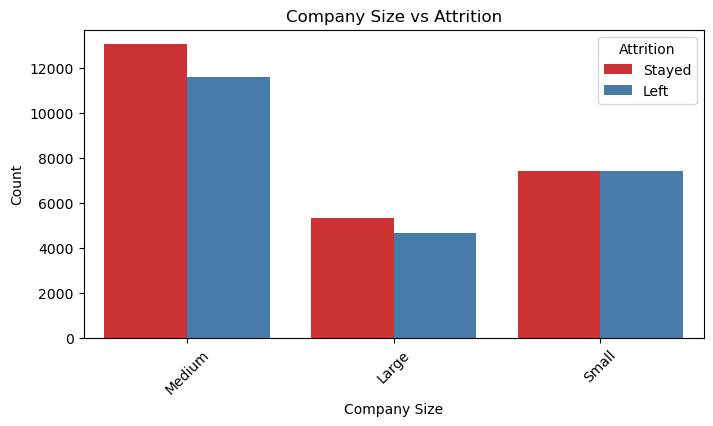

Chi-square Test for Company Size and Attrition:
Chi2 Stat: 37.19586063319058, p-value: 8.37570723697e-09
Degrees of Freedom: 2
Expected Frequencies:
[[ 4774.33233557  5201.66766443]
 [11802.30650837 12858.69349163]
 [ 7086.36115606  7720.63884394]]
--------------------------------------------------


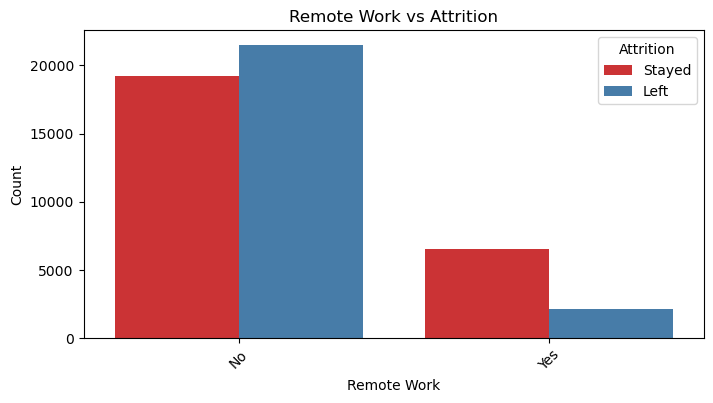

Chi-square Test for Remote Work and Attrition:
Chi2 Stat: 2259.89570684073, p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[19497.42375212 21242.57624788]
 [ 4165.57624788  4538.42375212]]
--------------------------------------------------


Chi-square Test for Leadership Opportunities and Attrition:
Chi2 Stat: 4.443348975819831, p-value: 0.03503745335103382
Degrees of Freedom: 1
Expected Frequencies:
[[22525.41099021 24541.58900979]
 [ 1137.58900979  1239.41099021]]
--------------------------------------------------


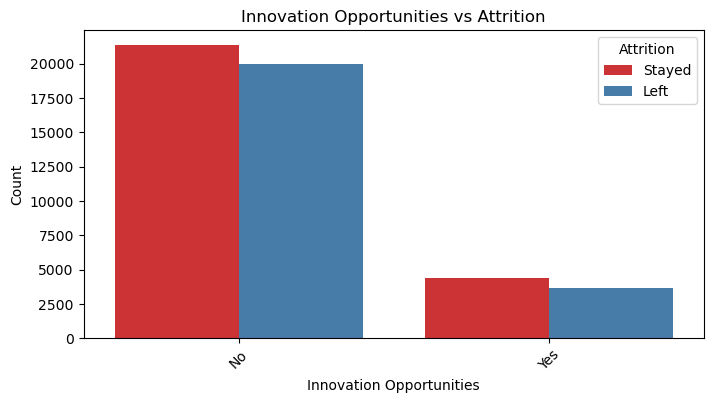

Chi-square Test for Innovation Opportunities and Attrition:
Chi2 Stat: 21.811871282167672, p-value: 3.0073365895284732e-06
Degrees of Freedom: 1
Expected Frequencies:
[[19801.80179597 21574.19820403]
 [ 3861.19820403  4206.80179597]]
--------------------------------------------------


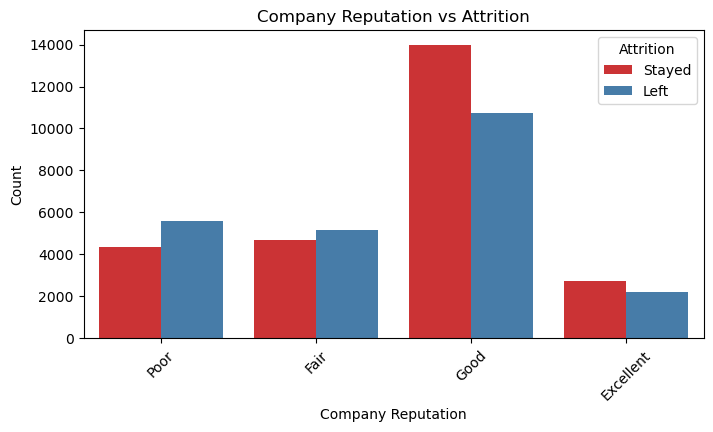

Chi-square Test for Company Reputation and Attrition:
Chi2 Stat: 567.5810259371785, p-value: 1.0741460914191127e-122
Degrees of Freedom: 3
Expected Frequencies:
[[ 2371.85154923  2584.14845077]
 [ 4710.68095219  5132.31904781]
 [11830.54283634 12889.45716366]
 [ 4749.92466224  5175.07533776]]
--------------------------------------------------


In [575]:
# Plot distribution for each categorical column with target variable

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through each categorical column
for col in categorical_cols:
    # Plot the distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(data=X_train, x=col, hue=y_train, palette='Set1')  # Changed hue to y_train
    plt.title(f"{col} vs Attrition")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.savefig('plot image 4.png')
    plt.show()
       
    # Perform Chi-square test to see the association with 'Attrition'
    contingency_table = pd.crosstab(X_train[col], y_train)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square Test for {col} and Attrition:")
    print(f"Chi2 Stat: {chi2}, p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}")
    print("-" * 50)

#### 6. Bivariate analysis of categorical columns with target column i.e 'Attrition' and Chi square test shows p values for all columns under stable value(<0.05). Thus model can be trained with training data. 

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [581]:
# Select numerical columns
numerical_cols_val = X_val.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns in Validation Data:", numerical_cols_val)

Numerical Columns in Validation Data: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


5.1.2 Plot distribution of numerical columns


Descriptive Statistics for Age in Validation Data:
count    21191.000000
mean        38.570148
std         12.011178
min         18.000000
25%         28.000000
50%         39.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64


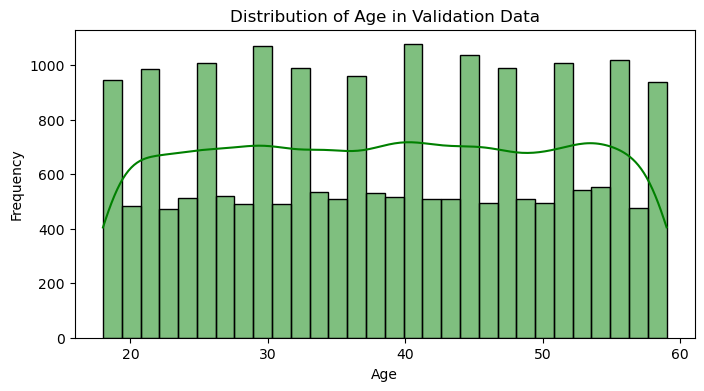


Descriptive Statistics for Years at Company in Validation Data:
count    21191.000000
mean        15.741588
std         11.197917
min          1.000000
25%          7.000000
50%         13.000000
75%         23.000000
max         51.000000
Name: Years at Company, dtype: float64


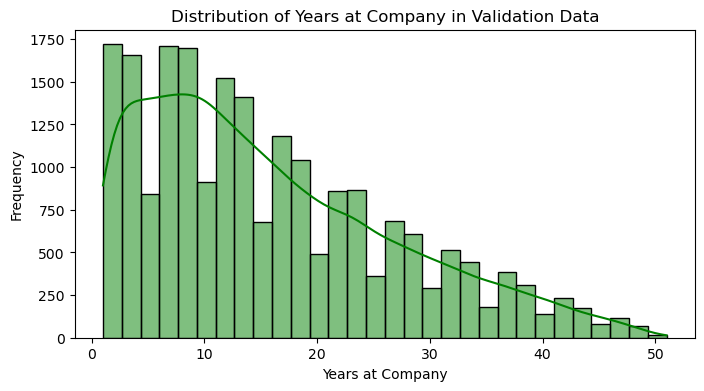


Descriptive Statistics for Monthly Income in Validation Data:
count    21191.000000
mean      7343.844132
std       2595.982675
min       1226.000000
25%       5649.000000
50%       7349.000000
75%       8863.000000
max      50030.000000
Name: Monthly Income, dtype: float64



Descriptive Statistics for Number of Promotions in Validation Data:
count    21191.000000
mean         0.833514
std          0.987430
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Number of Promotions, dtype: float64


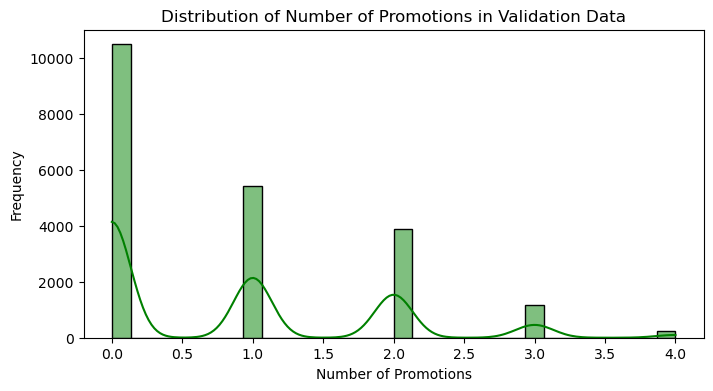


Descriptive Statistics for Distance from Home in Validation Data:
count    21191.000000
mean        49.911425
std         28.450355
min          1.000000
25%         25.000000
50%         50.000000
75%         74.000000
max         99.000000
Name: Distance from Home, dtype: float64


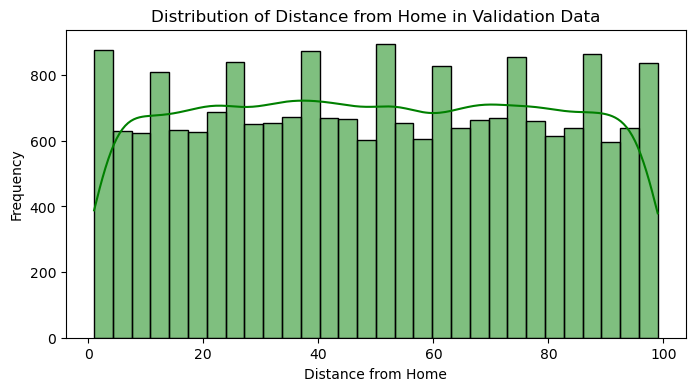


Descriptive Statistics for Number of Dependents in Validation Data:
count    21191.000000
mean         1.645274
std          1.569418
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         15.000000
Name: Number of Dependents, dtype: float64



Descriptive Statistics for Company Tenure (In Months) in Validation Data:
count    21191.000000
mean        56.030532
std         25.476652
min          2.000000
25%         36.000000
50%         56.000000
75%         76.000000
max        126.000000
Name: Company Tenure (In Months), dtype: float64


In [583]:
# Plot all the numerical columns to understand their distribution
# Loop through each numerical column
for col in numerical_cols_val:
    # Print descriptive statistics
    print(f"\nDescriptive Statistics for {col} in Validation Data:")
    print(X_val[col].describe())
       
    # Plot the distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(X_val[col], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {col} in Validation Data")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig('plot image 5.png')
    plt.show()

#### 7. Univariate analysis of all numerical columns shows data to be fit for validation, as no outliers is present.

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.


Correlation Matrix of Numerical Columns in Validation Data:
                                 Age  Years at Company  Monthly Income  \
Age                         1.000000          0.529526        0.002933   
Years at Company            0.529526          1.000000       -0.003772   
Monthly Income              0.002933         -0.003772        1.000000   
Number of Promotions       -0.002202          0.001098        0.010682   
Distance from Home         -0.006949         -0.014279        0.001788   
Number of Dependents        0.004228          0.011178        0.006419   
Company Tenure (In Months)  0.243075          0.446189       -0.008660   

                            Number of Promotions  Distance from Home  \
Age                                    -0.002202           -0.006949   
Years at Company                        0.001098           -0.014279   
Monthly Income                          0.010682            0.001788   
Number of Promotions                    1.000000          

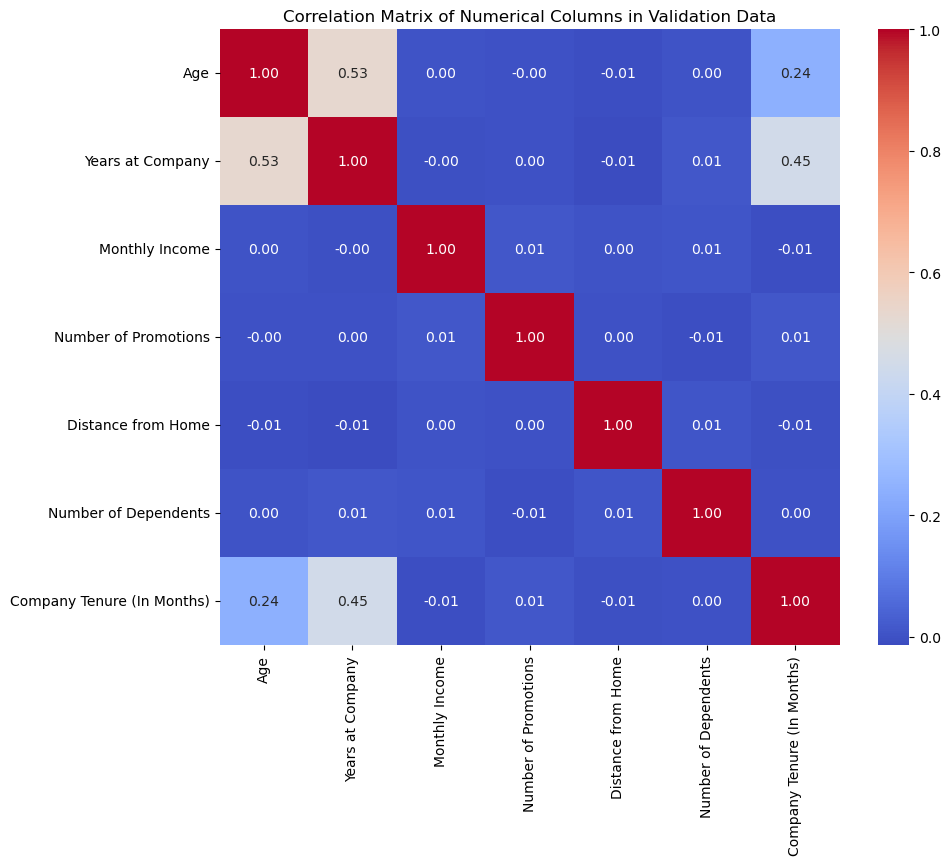

In [587]:
# Create correlation matrix for numerical columns
correlation_matrix_val = X_val[numerical_cols_val].corr()

# Print the correlation matrix (numerical/statistical information)
print("\nCorrelation Matrix of Numerical Columns in Validation Data:")
print(correlation_matrix_val)
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_val, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Numerical Columns in Validation Data")
plt.savefig('plot image 6.png')
plt.show()

#### 8. Coorelation Matrix shows no high coorelated data, so fit for validation.

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [591]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_val, palette='Set1')
plt.title("Class Balance in Validation Set")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No Attrition (0)', 'Attrition (1)'])  # Label the classes
plt.savefig('plot image 7.png')
plt.show()

#### 9. Class balance shows data are balanced, thus good for validation as validated data will not get overfitted.

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

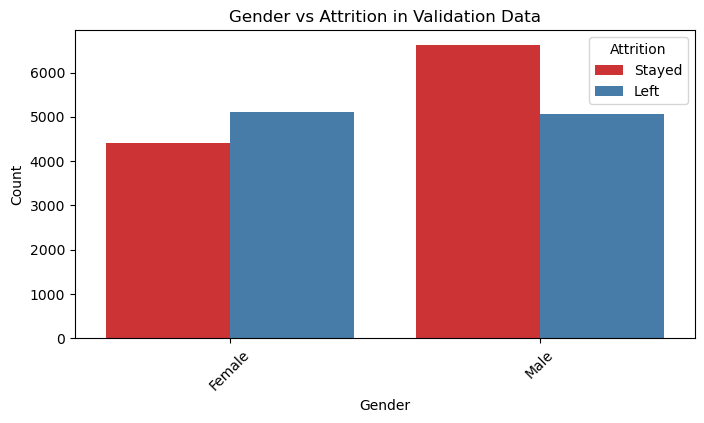

Chi-square Test for Gender and Attrition in Validation Data:
Chi2 Stat: 226.27861604243256, p-value: 3.8631592418867364e-51
Degrees of Freedom: 1
Expected Frequencies:
[[4562.37402671 4951.62597329]
 [5599.62597329 6077.37402671]]
--------------------------------------------------


Chi-square Test for Job Role and Attrition in Validation Data:
Chi2 Stat: 7.516674823235406, p-value: 0.11097624743264715
Degrees of Freedom: 4
Expected Frequencies:
[[2157.94441036 2342.05558964]
 [1420.40696522 1541.59303478]
 [2353.5980369  2554.4019631 ]
 [1617.49922137 1755.50077863]
 [2612.55136615 2835.44863385]]
--------------------------------------------------


Chi-square Test for Work-Life Balance and Attrition in Validation Data:
Chi2 Stat: 817.4906605598957, p-value: 6.964184990857207e-177
Degrees of Freedom: 3
Expected Frequencies:
[[1790.6143174  1943.3856826 ]
 [3119.90807418 3386.09192582]
 [3865.59775376 4195.40224624]
 [1385.87985466 1504.12014534]]
--------------------------------------------------


Chi-square Test for Job Satisfaction and Attrition in Validation Data:
Chi2 Stat: 95.15110461755884, p-value: 1.7133320232826012e-20
Degrees of Freedom: 3
Expected Frequencies:
[[5117.68505498 5554.31494502]
 [ 999.8475768  1085.1524232 ]
 [2011.20419046 2182.79580954]
 [2033.26317776 2206.73682224]]
--------------------------------------------------


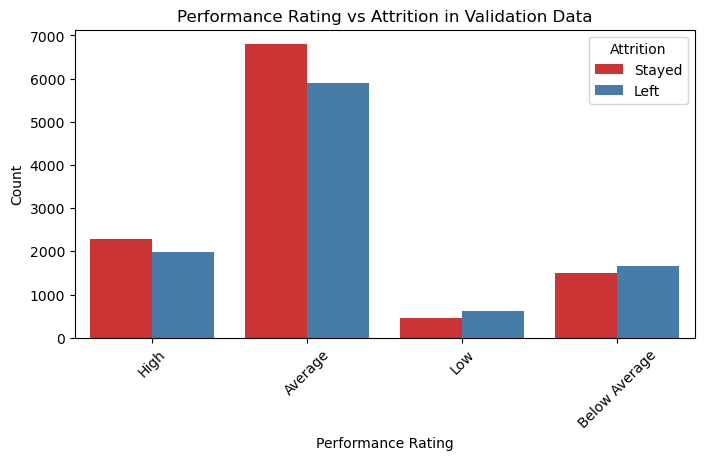

Chi-square Test for Performance Rating and Attrition in Validation Data:
Chi2 Stat: 81.87718775747298, p-value: 1.2143011260016049e-17
Degrees of Freedom: 3
Expected Frequencies:
[[6090.19866925 6609.80133075]
 [1510.08154405 1638.91845595]
 [2045.73130102 2220.26869898]
 [ 515.98848568  560.01151432]]
--------------------------------------------------


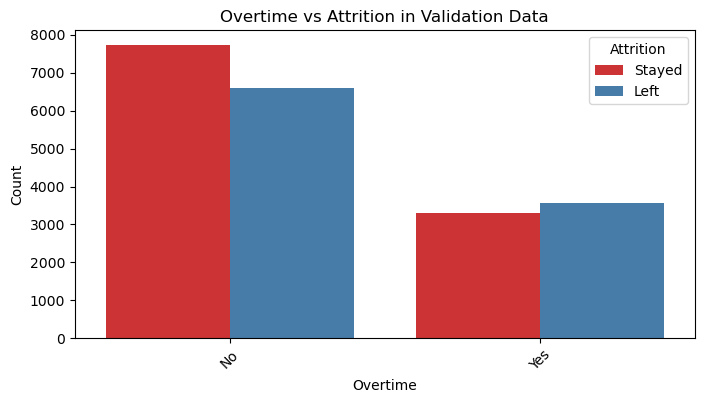

Chi-square Test for Overtime and Attrition in Validation Data:
Chi2 Stat: 68.39957237010516, p-value: 1.3350651203779396e-16
Degrees of Freedom: 1
Expected Frequencies:
[[6868.01774338 7453.98225662]
 [3293.98225662 3575.01774338]]
--------------------------------------------------


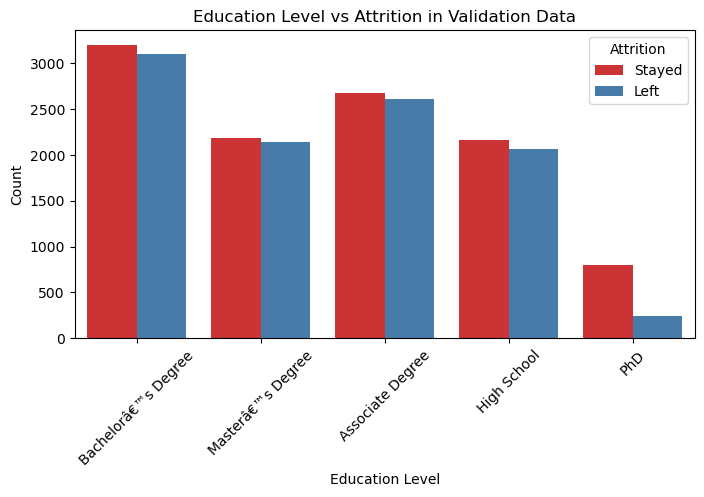

Chi-square Test for Education Level and Attrition in Validation Data:
Chi2 Stat: 269.51461474851044, p-value: 4.058898832952791e-57
Degrees of Freedom: 4
Expected Frequencies:
[[2538.22216979 2754.77783021]
 [3025.91760653 3284.08239347]
 [2026.07002973 2198.92997027]
 [2074.50389316 2251.49610684]
 [ 497.28630079  539.71369921]]
--------------------------------------------------


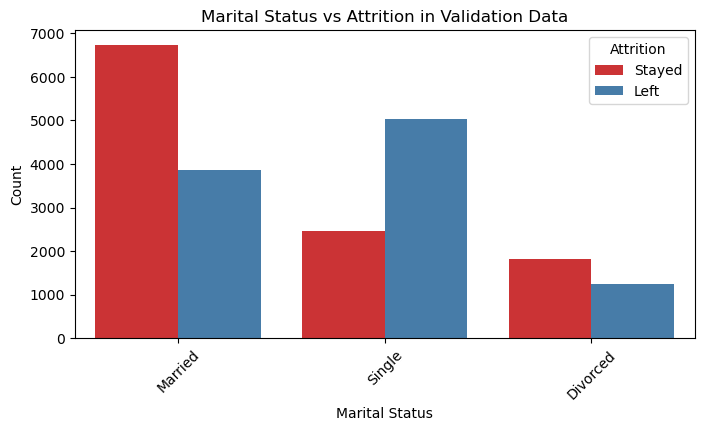

Chi-square Test for Marital Status and Attrition in Validation Data:
Chi2 Stat: 1739.763174676003, p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[1475.55443349 1601.44556651]
 [5085.07611722 5518.92388278]
 [3601.36944929 3908.63055071]]
--------------------------------------------------


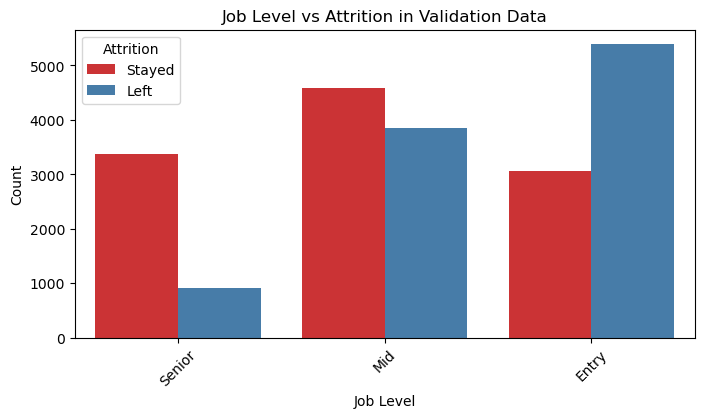

Chi-square Test for Job Level and Attrition in Validation Data:
Chi2 Stat: 2074.895850514563, p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[4056.45594828 4402.54405172]
 [4043.98782502 4389.01217498]
 [2061.5562267  2237.4437733 ]]
--------------------------------------------------


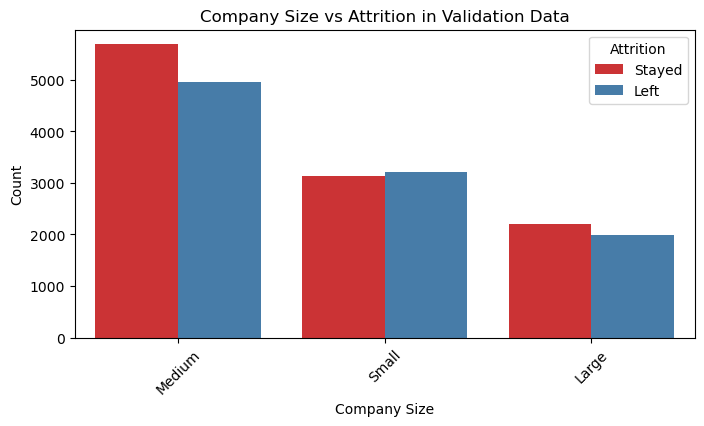

Chi-square Test for Company Size and Attrition in Validation Data:
Chi2 Stat: 26.069485657329018, p-value: 2.183147688726507e-06
Degrees of Freedom: 2
Expected Frequencies:
[[2010.24510405 2181.75489595]
 [5111.45099335 5547.54900665]
 [3040.3039026  3299.6960974 ]]
--------------------------------------------------


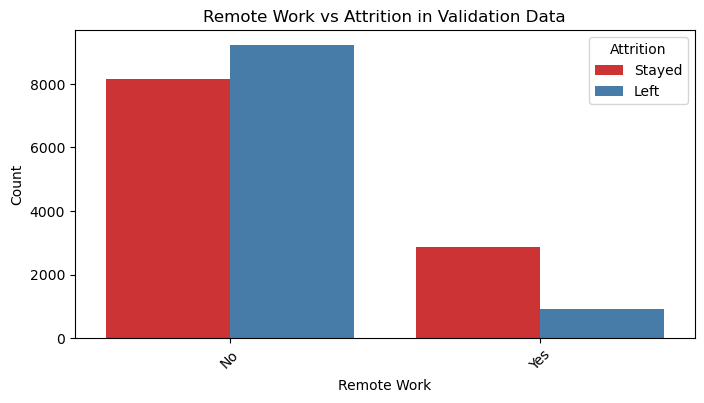

Chi-square Test for Remote Work and Attrition in Validation Data:
Chi2 Stat: 1019.290314372897, p-value: 1.151560030753496e-223
Degrees of Freedom: 1
Expected Frequencies:
[[8337.33811524 9048.66188476]
 [1824.66188476 1980.33811524]]
--------------------------------------------------


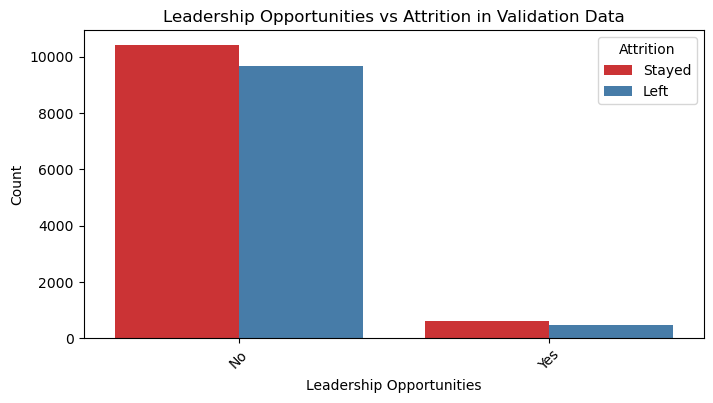

Chi-square Test for Leadership Opportunities and Attrition in Validation Data:
Chi2 Stat: 6.480329078497929, p-value: 0.010907478758021422
Degrees of Freedom: 1
Expected Frequencies:
[[ 9641.6956255 10464.3043745]
 [  520.3043745   564.6956255]]
--------------------------------------------------


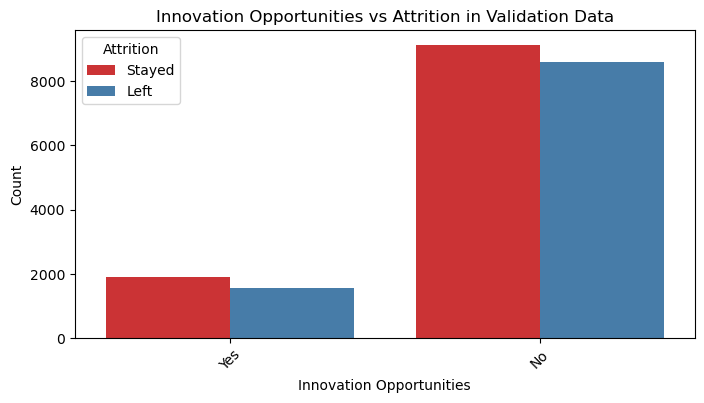

Chi-square Test for Innovation Opportunities and Attrition in Validation Data:
Chi2 Stat: 13.968094768273154, p-value: 0.00018593933032333052
Degrees of Freedom: 1
Expected Frequencies:
[[8498.94417441 9224.05582559]
 [1663.05582559 1804.94417441]]
--------------------------------------------------


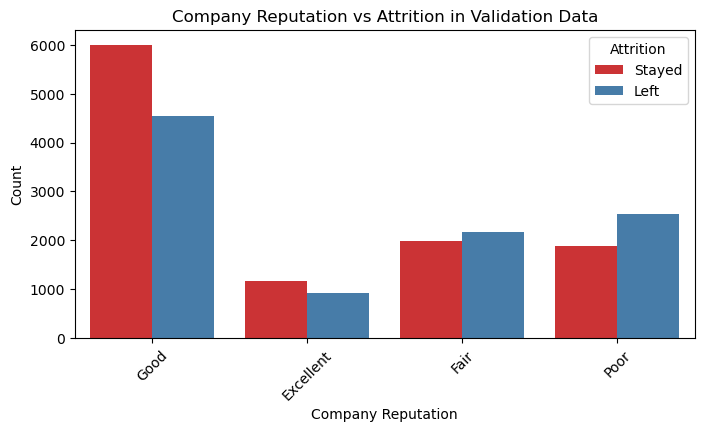

Chi-square Test for Company Reputation and Attrition in Validation Data:
Chi2 Stat: 299.7121418636125, p-value: 1.1483371107936124e-64
Degrees of Freedom: 3
Expected Frequencies:
[[ 992.17488556 1076.82511444]
 [1989.62474635 2159.37525365]
 [5062.53758671 5494.46241329]
 [2117.66278137 2298.33721863]]
--------------------------------------------------


In [595]:
# Plot distribution for each categorical column with target variable

# Identify categorical columns in validation data
categorical_cols_val = X_val.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through each categorical column
for col in categorical_cols_val:
    
    # Plot the distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(data=X_val, x=col, hue=y_val, palette='Set1')
    plt.title(f"{col} vs Attrition in Validation Data")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.savefig('plot image 8.png')
    plt.show()
       
    # Perform Chi-square test to see the association with 'Attrition' in validation data
    contingency_table = pd.crosstab(X_val[col], y_val)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square Test for {col} and Attrition in Validation Data:")
    print(f"Chi2 Stat: {chi2}, p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}")
    print("-" * 50)

#### 10. Bivariate analysis of categorical columns with target column i.e 'Attrition' and Chi square test shows p values for all columns under stable value(<0.05). Thus trained model will work good with valided data.

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [600]:
# Check the categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns in Training Set:", categorical_cols)

Categorical Columns in Training Set: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [602]:
# Create dummy variables using the 'get_dummies' for independent columns

# Add the results to the master DataFrame
X_train_dummies = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

Now, drop the original categorical columns and check the DataFrame

In [604]:
# Drop the original categorical columns and check the DataFrame
print("Training Set After Dummy Variable Creation:")
X_train_dummies

Training Set After Dummy Variable Creation:


Age  Years at Company  Monthly Income  Number of Promotions  \
1516    39                25            5980                     1   
3352    19                 3            8663                     2   
59196   49                29            6195                     0   
71453   30                 9            5753                     1   
68890   26                15            5811                     2   
...    ...               ...             ...                   ...   
15937   29                 2            8460                     0   
66958   41                28           12088                     1   
69203   21                12            6590                     0   
59485   30                 9            6152                     0   
40956   19                 1            4476                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
1516                 31.0                     1                        67.0   
3352                 58.0                     4                        78.0   
59196                66.0                     1                        89.0   
71453                59.0                     3                        17.0   
68890                76.0                     2                        89.0   
...                   ...                   ...                         ...   
15937                41.0                     0                        62.0   
66958                42.0                     2                        57.0   
69203                38.0                     3                        45.0   
59485                 8.0                     3                        86.0   
40956                85.0                     1                        17.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  Job Level_Mid  \
1516         False             False                False  ...          False   
3352          True             False                False  ...          False   
59196        False             False                False  ...           True   
71453         True             False                False  ...          False   
68890        False             False                False  ...          False   
...            ...               ...                  ...  ...            ...   
15937        False             False                 True  ...          False   
66958         True              True                False  ...          False   
69203         True             False                False  ...          False   
59485        False             False                False  ...          False   
40956        False             False                False  ...          False   

       Job Level_Senior  Company Size_Medium  Company Size_Small  \
1516              False                 True               False   
3352               True                 True               False   
59196             False                 True               False   
71453             False                 True               False   
68890              True                 True               False   
...                 ...                  ...                 ...   
15937             False                 True               False   
66958             False                False                True   
69203              True                 True               False   
59485              True                 True               False   
40956              True                 True               False   

       Remote Work_Yes  Leadership Opportunities_Yes  \
1516             False                         False   
3352             False                         False   
59196            False                         False   
71453            False                         False   
68890            False                         False   
...                ...                           ...   
15937            False             

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [606]:
# Create dummy variables using the 'get_dummies' for independent columns

# Add the results to the master DataFrame

X_val_dummies = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

X_val_dummies = X_val_dummies.reindex(columns=X_train_dummies.columns, fill_value=0) ## Align the validation set's columns with the training set to ensure consistency


Now, drop the original categorical columns and check the DataFrame

In [608]:
# Drop categorical columns and check the DataFrame
print("Validation Set After Dummy Variable Creation:")
X_val_dummies.head()

Validation Set After Dummy Variable Creation:


Age  Years at Company  Monthly Income  Number of Promotions  \
38726   22                 5            8751                     2   
24574   43                19            8585                     2   
21775   39                 2            5462                     1   
42700   30                11            7936                     2   
60433   49                37            5413                     1   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
38726                32.0                     1                        36.0   
24574                38.0                     4                        35.0   
21775                40.0                     1                        49.0   
42700                21.0                     0                        44.0   
60433                13.0                     0                        78.0   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  Job Level_Mid  \
38726        False             False                 True  ...          False   
24574        False             False                False  ...          False   
21775         True             False                False  ...           True   
42700         True             False                False  ...          False   
60433        False             False                False  ...          False   

       Job Level_Senior  Company Size_Medium  Company Size_Small  \
38726              True                 True               False   
24574              True                 True               False   
21775             False                False                True   
42700             False                False                True   
60433             False                False                True   

       Remote Work_Yes  Leadership Opportunities_Yes  \
38726            False                         False   
24574            False                         False   
21775            False                         False   
42700            False                         False   
60433            False                         False   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
38726                          True                    False   
24574                         False                    False   
21775                          True                    False   
42700                         False                     True   
60433                         False                    False   

       Company Reputation_Good  Company Reputation_Poor  
38726                     True                    False  
24574                     True                    False  
21775                    False                    False  
42700                    False                    False  
60433                     True                    False  

[5 rows x 38 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [610]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])
y_val_df = pd.DataFrame(y_val, columns=['Attrition'])

# Check the DataFrames
print("Training Target DataFrame:")
print(y_train_df.head())

print("\nValidation Target DataFrame:")
print(y_val_df.head())

Training Target DataFrame:
      Attrition
1516     Stayed
3352     Stayed
59196      Left
71453      Left
68890      Left

Validation Target DataFrame:
      Attrition
38726    Stayed
24574    Stayed
21775    Stayed
42700    Stayed
60433      Left


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [612]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies = pd.get_dummies(y_train_df, columns=['Attrition'], drop_first=True)

# Check the new DataFrame with dummy variables
print("Training Target After Dummy Variable Creation:")
y_train_dummies.head()

Training Target After Dummy Variable Creation:


Attrition_Stayed
1516               True
3352               True
59196             False
71453             False
68890             False

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [614]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val_dummies = pd.get_dummies(y_val_df, columns=['Attrition'],drop_first=True)

# Check the new DataFrame with dummy variables
print("Validation Target After Dummy Variable Creation:")
y_val_dummies.head()

Validation Target After Dummy Variable Creation:


Attrition_Stayed
38726              True
24574              True
21775              True
42700              True
60433             False

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [616]:
# Drop redundant columns from both train and validation
# redundant columns have been already dropped using drop_first=True command

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [619]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [621]:
# Scale the numeric features present in the training set

# Identify numerical columns in the training set
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns in Training Set:", numerical_cols)

# Scale the numeric features present in the training set
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features in the training set
X_train_scaled = X_train_dummies.copy()  # Create a copy of the dummy DataFrame
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_dummies[numerical_cols])

# Check the scaled training set
print("Training Set After Scaling:")
print(X_train_scaled.head())

print("--------------------------------------------------------------")

# Scale the numerical features present in the validation set
# Transform the numerical features in the validation set using the same scaler
X_val_scaled = X_val_dummies.copy()  # Create a copy of the dummy DataFrame
X_val_scaled[numerical_cols] = scaler.transform(X_val_dummies[numerical_cols])

# Check the scaled validation set
print("Validation Set After Scaling:")
print(X_val_scaled.head())

Numerical Columns in Training Set: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']
Training Set After Scaling:
            Age  Years at Company  Monthly Income  Number of Promotions  \
1516   0.040209          0.826635       -0.541329              0.169391   
3352  -1.610906         -1.131550        0.525405              1.171706   
59196  0.865767          1.182668       -0.455847             -0.832925   
71453 -0.702793         -0.597500       -0.631582              0.169391   
68890 -1.033016         -0.063449       -0.608522              1.171706   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
1516            -0.666328             -0.417050                    0.449818   
3352             0.279039              1.485045                    0.883607   
59196            0.559147             -0.417050                    1.317397   
71453            0.31405

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [625]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [627]:
# Import RFE and select 15 variables

# Import RFE
from sklearn.feature_selection import RFE
# Create a Logistic Regression object
logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Initialize RFE with 15 features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on the scaled training data
rfe.fit(X_train_scaled, y_train_dummies['Attrition_Stayed'])

# Assigning the features selected by RFE to selected_features
selected_features = X_train_scaled.columns[rfe.support_]

In [628]:
# Display the features selected by RFE
print("Features Selected by RFE:")
print(selected_features)

Features Selected by RFE:
Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [630]:
# Put columns selected by RFE into variable 'col'

# Create new DataFrames with only the selected features
X_train_rfe = X_train_scaled[selected_features]
X_val_rfe = X_val_scaled[selected_features]

# Verify the shapes of the new DataFrames
print("Training Set Shape After RFE:", X_train_rfe.shape)
print("Validation Set Shape After RFE:", X_val_rfe.shape)

Training Set Shape After RFE: (49444, 15)
Validation Set Shape After RFE: (21191, 15)


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [633]:
# Select only the columns selected by RFE
X_train_rfe = X_train_scaled[selected_features]

In [634]:
# View the training data
print("Training Data After RFE:")
X_train_rfe.head()

Training Data After RFE:


Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
1516         False                   False                   False   
3352          True                   False                   False   
59196        False                   False                   False   
71453         True                   False                   False   
68890        False                    True                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
1516                  False                       False   
3352                  False                       False   
59196                 False                       False   
71453                 False                       False   
68890                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
1516                              False                   False         False   
3352                              False                   False         False   
59196                             False                   False         False   
71453                             False                   False          True   
68890                              True                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
1516                 False                  False          False   
3352                 False                  False          False   
59196                False                  False           True   
71453                False                  False          False   
68890                False                  False          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
1516              False            False                    False   
3352               True            False                     True   
59196             False            False                    False   
71453             False            False                    False   
68890              True            False                    False   

       Company Reputation_Poor  
1516                      True  
3352                     False  
59196                    False  
71453                     True  
68890                    False

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [636]:
# Import statsmodels and add constant to training set

import statsmodels.api as sm

# Add a constant to the training set
X_train_rfe_const = sm.add_constant(X_train_rfe)

# View the training data with the constant
print("Training Data with Constant:")
X_train_rfe_const.head()

Training Data with Constant:


const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
1516     1.0        False                   False                   False   
3352     1.0         True                   False                   False   
59196    1.0        False                   False                   False   
71453    1.0         True                   False                   False   
68890    1.0        False                    True                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
1516                  False                       False   
3352                  False                       False   
59196                 False                       False   
71453                 False                       False   
68890                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
1516                              False                   False         False   
3352                              False                   False         False   
59196                             False                   False         False   
71453                             False                   False          True   
68890                              True                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
1516                 False                  False          False   
3352                 False                  False          False   
59196                False                  False           True   
71453                False                  False          False   
68890                False                  False          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
1516              False            False                    False   
3352               True            False                     True   
59196             False            False                    False   
71453             False            False                    False   
68890              True            False                    False   

       Company Reputation_Poor  
1516                      True  
3352                     False  
59196                    False  
71453                     True  
68890                    False

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [638]:
# Fit a logistic regression model on X_train after adding a constant and output the summary

# Convert all bool columns in X_train_rfe_const to int64
X_train_rfe_const = X_train_rfe_const.astype(int)

# Convert the target variable y_train_dummies['Attrition_Yes'] to int64
y_train_dummies['Attrition_Stayed'] = y_train_dummies['Attrition_Stayed'].astype(int)

# # Verify the data types after conversion
# print("Data Types After Conversion:")
# print(X_train_rfe_const.dtypes)
# print("\nTarget Variable Data Type After Conversion:")
# print(y_train_dummies['Attrition_Yes'].dtype)

# Fit the logistic regression model
logit_model = sm.Logit(y_train_dummies['Attrition_Stayed'], X_train_rfe_const)

# Fit the model and print the summary
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507072
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.2675
Time:                        06:28:04   Log-Likelihood:                -25072.
converged:                       True   LL-Null:                       -34227.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2356      0.028      8.33

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



#### 11. Here we see that the p value is under stable condition (<0.05), so we move forward and evaluate others features like VIF and drop columns if needed.

7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [642]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [643]:
# Make a VIF DataFrame for all the variables present

# Drop the constant column for VIF calculation
X_train_rfe_no_const = X_train_rfe_const.drop(columns=['const'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_rfe_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_rfe_no_const.values, i) for i in range(X_train_rfe_no_const.shape[1])]

# Display the VIF DataFrame
print("VIF Values for Features:")
vif_data

VIF Values for Features:


Feature       VIF
0                        Gender_Male  1.833896
1             Work-Life Balance_Fair  1.405440
2             Work-Life Balance_Poor  1.184568
3               Job Satisfaction_Low  1.117504
4         Job Satisfaction_Very High  1.233705
5   Performance Rating_Below Average  1.153786
6             Performance Rating_Low  1.051850
7                       Overtime_Yes  1.385818
8                Education Level_PhD  1.046235
9              Marital Status_Single  1.418871
10                     Job Level_Mid  1.648469
11                  Job Level_Senior  1.325634
12                   Remote Work_Yes  1.179147
13           Company Reputation_Fair  1.255262
14           Company Reputation_Poor  1.257179

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

#### 12. Here we see VIF values are low, so we can move further to make predictions on training data.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [647]:
# Predict the probabilities on the training set

y_train_pred_prob = result.predict(X_train_rfe_const)
print("Predicted Probabilities on Training Set:")
y_train_pred_prob.head()

Predicted Probabilities on Training Set:


1516     0.377470
3352     0.943345
59196    0.767937
71453    0.436563
68890    0.802680
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [649]:
# Reshape it into an array

y_train_pred_prob_array = y_train_pred_prob.values.reshape(-1, 1)

# View the reshaped array
print("Reshaped Predicted Probabilities:")
y_train_pred_prob_array[:5]

Reshaped Predicted Probabilities:


array([[0.37746979],
       [0.94334509],
       [0.76793652],
       [0.4365627 ],
       [0.80267965]])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [651]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model

train_results = pd.DataFrame({
    'Actual': y_train_dummies['Attrition_Stayed'],
    'Predicted_Probability': y_train_pred_prob
})

# View the first few rows of the DataFrame
print("Training Results DataFrame:")
train_results.head()

Training Results DataFrame:


Actual  Predicted_Probability
1516        1               0.377470
3352        1               0.943345
59196       0               0.767937
71453       0               0.436563
68890       0               0.802680

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [653]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0

train_results['Predicted'] = (train_results['Predicted_Probability'] > 0.5).astype(int)

# View the updated DataFrame
print("Training Results with Predicted Column:")
train_results.head()

Training Results with Predicted Column:


Actual  Predicted_Probability  Predicted
1516        1               0.377470          0
3352        1               0.943345          1
59196       0               0.767937          1
71453       0               0.436563          0
68890       0               0.802680          1

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [656]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(train_results['Actual'], train_results['Predicted'])
print(f"Accuracy of the Model: {accuracy:.5f}")

Accuracy of the Model: 0.73873


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [658]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(train_results['Actual'], train_results['Predicted'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[17104  6559]
 [ 6359 19422]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [660]:
# Create variables for true positive, true negative, false positive and false negative
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Display the values
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

True Negative (TN): 17104
False Positive (FP): 6559
False Negative (FN): 6359
True Positive (TP): 19422


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [662]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {sensitivity:.5f}")

Sensitivity (Recall): 0.75335


In [663]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.5f}")

Specificity: 0.72282


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [665]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.5f}")

Precision: 0.74755


In [666]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.5f}")

Recall: 0.75335


#### 13. **Metric**     | **Training Model**  

| Accuracy               | 73.873 %            |
| Sensitivity (Recall)   | 74.335 %            |  
| Specificity            | 72.282 %            | 
| Precision              | 74.282 %            | 

These values are good and can used for evaluation. 

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [670]:
# Define ROC function
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_true, y_pred_prob):
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Print AUC
    print(f"\nAUC (Area Under Curve): {roc_auc:.5f}")

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.5f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.savefig('plot image 9.png')
    plt.show()


AUC (Area Under Curve): 0.82539


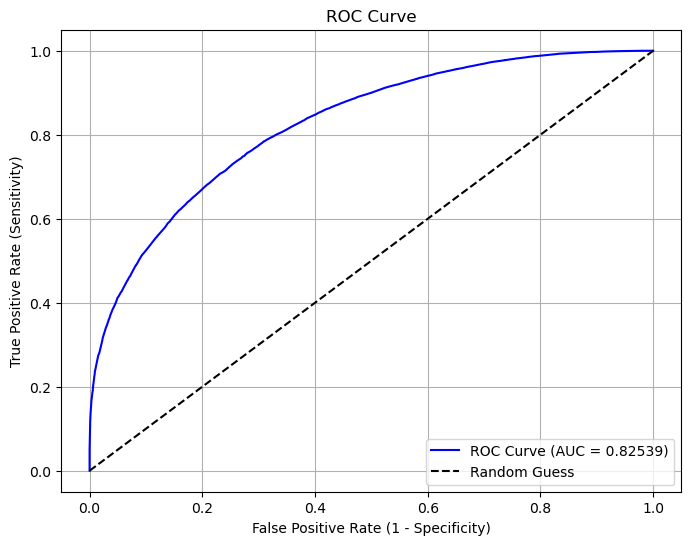

In [671]:
# Call the ROC function
plot_roc_curve(train_results['Actual'], train_results['Predicted_Probability'])

#### 14. ROC curve lies above the Random Guess, so stable model parameters. Also the value of AUC is good.

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [675]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    train_results[f'Predicted_{threshold}'] = (train_results['Predicted_Probability'] > threshold).astype(int)

# View the first few rows of the updated DataFrame
print("Training Results with Predictions at Different Thresholds:")
train_results.head()

Training Results with Predictions at Different Thresholds:


Actual  Predicted_Probability  Predicted  Predicted_0.1  Predicted_0.2  \
1516        1               0.377470          0              1              1   
3352        1               0.943345          1              1              1   
59196       0               0.767937          1              1              1   
71453       0               0.436563          0              1              1   
68890       0               0.802680          1              1              1   

       Predicted_0.3  Predicted_0.4  Predicted_0.5  Predicted_0.6  \
1516               1              0              0              0   
3352               1              1              1              1   
59196              1              1              1              1   
71453              1              1              0              0   
68890              1              1              1              1   

       Predicted_0.7  Predicted_0.8  Predicted_0.9  
1516               0              0              0  
3352               1              1              1  
59196              1              0              0  
71453              0              0              0  
68890              1              1              0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [677]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

metrics_df = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])

for threshold in thresholds:
    predicted_col = f'Predicted_{threshold}'
    conf_matrix = metrics.confusion_matrix(train_results['Actual'], train_results[predicted_col])
    
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    # Use pd.concat instead of append
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Accuracy': [accuracy],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity]
    })
    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Display the metrics DataFrame
print("Metrics at Different Thresholds:")
metrics_df

Metrics at Different Thresholds:


Threshold  Accuracy  Sensitivity  Specificity
0        0.1  0.587392     0.994686     0.143642
1        0.2  0.659352     0.961289     0.330389
2        0.3  0.703968     0.909623     0.479905
3        0.4  0.731312     0.839455     0.613489
4        0.5  0.738735     0.753345     0.722816
5        0.6  0.729209     0.644467     0.821536
6        0.7  0.704939     0.527714     0.898026
7        0.8  0.660464     0.387689     0.957655
8        0.9  0.587614     0.215973     0.992520


Best Thresholds Based on Individual Metrics:
Max Accuracy     @ Threshold 0.50000 -> Accuracy = 0.73873
Max Sensitivity  @ Threshold 0.10000 -> Sensitivity = 0.99469
Max Specificity  @ Threshold 0.90000 -> Specificity = 0.99252


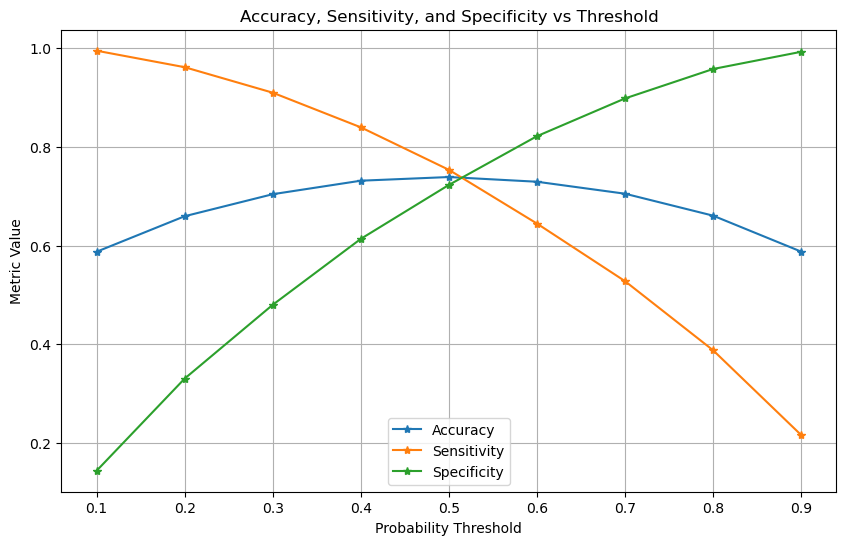

In [678]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

def print_metrics_table(metrics_df):
        # Best thresholds
    best_acc = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
    best_sens = metrics_df.loc[metrics_df['Sensitivity'].idxmax()]
    best_spec = metrics_df.loc[metrics_df['Specificity'].idxmax()]

    print("\nBest Thresholds Based on Individual Metrics:")
    print(f"Max Accuracy     @ Threshold {best_acc['Threshold']:.5f} -> Accuracy = {best_acc['Accuracy']:.5f}")
    print(f"Max Sensitivity  @ Threshold {best_sens['Threshold']:.5f} -> Sensitivity = {best_sens['Sensitivity']:.5f}")
    print(f"Max Specificity  @ Threshold {best_spec['Threshold']:.5f} -> Specificity = {best_spec['Specificity']:.5f}")

# Call the print function
print_metrics_table(metrics_df)

# Then plot
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy', marker='*')
plt.plot(metrics_df['Threshold'], metrics_df['Sensitivity'], label='Sensitivity', marker='*')
plt.plot(metrics_df['Threshold'], metrics_df['Specificity'], label='Specificity', marker='*')
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.title('Accuracy, Sensitivity, and Specificity vs Threshold')
plt.legend()
plt.grid()
plt.savefig('plot image 10.png')
plt.show()

#### 15. After evaluating performance metrics on different cut off values, at 0.5 cut-off value the metric performance is best. This was the same value at which we have calculated the performance metrics of training model earlier.

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [681]:
# Create a column for final prediction based on the optimal cutoff

metrics_df['Geometric_Mean'] = (metrics_df['Sensitivity'] * metrics_df['Specificity']) ** 0.5
optimal_threshold = metrics_df.loc[metrics_df['Geometric_Mean'].idxmax()]['Threshold']
print(f"Optimal Threshold Based on Geometric Mean: {optimal_threshold}")

train_results['Final_Prediction'] = (train_results['Predicted_Probability'] > optimal_threshold).astype(int)

# View the first few rows of the updated DataFrame
print("Final Predictions Based on Optimal Threshold:")
train_results[['Actual', 'Predicted_Probability', 'Final_Prediction']].head()

Optimal Threshold Based on Geometric Mean: 0.5
Final Predictions Based on Optimal Threshold:


Actual  Predicted_Probability  Final_Prediction
1516        1               0.377470                 0
3352        1               0.943345                 1
59196       0               0.767937                 1
71453       0               0.436563                 0
68890       0               0.802680                 1

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [683]:
# Calculate the accuracy
final_accuracy = metrics.accuracy_score(train_results['Actual'], train_results['Final_Prediction'])
print(f"Accuracy of the Model with Optimal Threshold: {final_accuracy:.5f}")

Accuracy of the Model with Optimal Threshold: 0.73873


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [685]:
# Create the confusion matrix once again
final_conf_matrix = metrics.confusion_matrix(train_results['Actual'], train_results['Final_Prediction'])

# Display the confusion matrix
print("Confusion Matrix with Optimal Threshold:")
print(final_conf_matrix)

Confusion Matrix with Optimal Threshold:
[[17104  6559]
 [ 6359 19422]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [687]:
# Create variables for true positive, true negative, false positive and false negative
TN = final_conf_matrix[0, 0]
FP = final_conf_matrix[0, 1]
FN = final_conf_matrix[1, 0]
TP = final_conf_matrix[1, 1]

# Display the values
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

True Negative (TN): 17104
False Positive (FP): 6559
False Negative (FN): 6359
True Positive (TP): 19422


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [689]:
# Calculate Sensitivity
final_sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {final_sensitivity:.5f}")

Sensitivity (Recall): 0.75335


In [690]:
# Calculate Specificity
final_specificity = TN / (TN + FP)
print(f"Specificity: {final_specificity:.5f}")

Specificity: 0.72282


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [692]:
# Calculate Precision
final_precision = TP / (TP + FP)
print(f"Precision: {final_precision:.5f}")

Precision: 0.74755


In [693]:
# Calculate Recall
final_recall = final_sensitivity
print(f"Recall: {final_recall:.5f}")

Recall: 0.75335


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [695]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [696]:
# Check actual and predicted values from initial model
precision, recall, thresholds_pr = precision_recall_curve(train_results['Actual'], train_results['Predicted_Probability'])

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

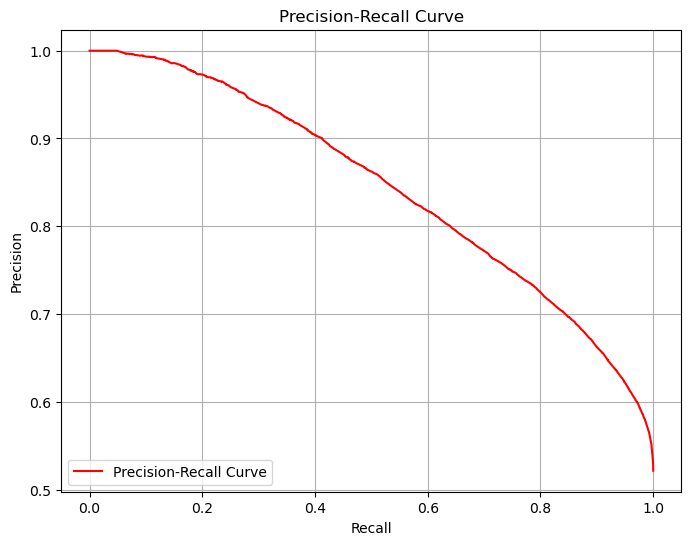


Best F1 Score: 0.76652
At this point -> Precision: 0.69107, Recall: 0.86048


In [698]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.savefig('plot image 11.png')
plt.show()

# Find point with highest F1 score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # small epsilon to avoid div by 0
best_idx = np.argmax(f1_scores)
print(f"\nBest F1 Score: {f1_scores[best_idx]:.5f}")
print(f"At this point -> Precision: {precision[best_idx]:.5f}, Recall: {recall[best_idx]:.5f}")

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [702]:
# Select the relevant features for validation set
X_val_rfe = X_val_scaled[selected_features]

# View the validation data
print("Validation Data After RFE:")
X_val_rfe.head()

Validation Data After RFE:


Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
38726        False                   False                   False   
24574        False                   False                   False   
21775         True                   False                    True   
42700         True                   False                   False   
60433        False                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
38726                 False                        True   
24574                 False                       False   
21775                 False                       False   
42700                 False                       False   
60433                 False                        True   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
38726                             False                   False         False   
24574                             False                   False         False   
21775                             False                   False         False   
42700                             False                   False         False   
60433                             False                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
38726                False                  False          False   
24574                False                  False          False   
21775                False                   True           True   
42700                False                  False          False   
60433                False                   True          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
38726              True            False                    False   
24574              True            False                    False   
21775             False            False                    False   
42700             False            False                     True   
60433             False            False                    False   

       Company Reputation_Poor  
38726                    False  
24574                    False  
21775                    False  
42700                    False  
60433                    False

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [704]:
# Add constant to X_validation
X_val_rfe_const = sm.add_constant(X_val_rfe)

# View the validation data with the constant
print("Validation Data with Constant:")
X_val_rfe_const.head()

Validation Data with Constant:


const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
38726    1.0        False                   False                   False   
24574    1.0        False                   False                   False   
21775    1.0         True                   False                    True   
42700    1.0         True                   False                   False   
60433    1.0        False                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
38726                 False                        True   
24574                 False                       False   
21775                 False                       False   
42700                 False                       False   
60433                 False                        True   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
38726                             False                   False         False   
24574                             False                   False         False   
21775                             False                   False         False   
42700                             False                   False         False   
60433                             False                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
38726                False                  False          False   
24574                False                  False          False   
21775                False                   True           True   
42700                False                  False          False   
60433                False                   True          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
38726              True            False                    False   
24574              True            False                    False   
21775             False            False                    False   
42700             False            False                     True   
60433             False            False                    False   

       Company Reputation_Poor  
38726                    False  
24574                    False  
21775                    False  
42700                    False  
60433                    False

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [706]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'

X_val_rfe_const = X_val_rfe_const.astype(int)  ### Convert all bool columns in X_val_rfe_const to int
y_validation_pred = result.predict(X_val_rfe_const)  ## make prediction

# View predictions
print("\nPredicted Probabilities on Validation Set:")
y_validation_pred.head()


Predicted Probabilities on Validation Set:


38726    0.907654
24574    0.940935
21775    0.237373
42700    0.569507
60433    0.126088
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [708]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted_Probability'])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_val_dummies['Attrition_Stayed'].values, columns=['Actual'])

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
validation_results = pd.concat([actual.reset_index(drop=True), predicted_probability.reset_index(drop=True)], axis=1)

# View the combined DataFrame
print("Validation Results DataFrame:")
validation_results.head()

Validation Results DataFrame:


Actual  Predicted_Probability
0    True               0.907654
1    True               0.940935
2    True               0.237373
3    True               0.569507
4   False               0.126088

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [710]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
optimal_threshold = 0.5    ## optimal_threshold found to be in training data =0.5
validation_results['Final_Prediction'] = (validation_results['Predicted_Probability'] > optimal_threshold).astype(int)

# Check the DataFrame
print("Validation Results with Final Predictions:")
validation_results.head()

Validation Results with Final Predictions:


Actual  Predicted_Probability  Final_Prediction
0    True               0.907654                 1
1    True               0.940935                 1
2    True               0.237373                 0
3    True               0.569507                 1
4   False               0.126088                 0

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [712]:
# Calculate the overall accuracy
accuracy = metrics.accuracy_score(validation_results['Actual'], validation_results['Final_Prediction'])
print(f"Accuracy of the Model on Validation Set: {accuracy:.5f}")

Accuracy of the Model on Validation Set: 0.73569


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [714]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(validation_results['Actual'], validation_results['Final_Prediction'])

In [715]:
# Create variables for true positive, true negative, false positive and false negative

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Display the confusion matrix and extracted values
print("Confusion Matrix:")
print(conf_matrix)
print("\nTrue Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

Confusion Matrix:
[[7357 2805]
 [2796 8233]]

True Negative (TN): 7357
False Positive (FP): 2805
False Negative (FN): 2796
True Positive (TP): 8233


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [717]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {sensitivity:.5f}")

Sensitivity (Recall): 0.74649


In [718]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.5f}")

Specificity: 0.72397


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [720]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.5f}")

Precision: 0.74588


In [721]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.5f}")

Recall: 0.74649


## Conclusion
###  16. Performance Overview**

| **Metric**             | **Training Model**  | **Validation Model** |
|------------------------|---------------------|----------------------|
| Accuracy               | 73.873 %            |  73.569 %            |
| Sensitivity (Recall)   | 74.335 %            |  74.649 %            |
| Specificity            | 72.282 %            |  72.397 %            |
| Precision              | 74.282 %            |  74.588 %            |

The model is performing good. The desired metric values of any model ranges: Accuracy: 75-80%, Sensitivity: 80–85%, Specificity: 70–75%, Precision: 70–75%.
By optimizing the threshold and making small adjustments to the model, we can improve the prediction of employees at risk of leaving while ensuring that resources are used effectively. The model is already performing well, but these improvements could make HR’s retention strategies even more proactive and efficient.

In [723]:
# Downloading the graph plot file

In [724]:
from IPython.display import FileLink
FileLink("plot image 1.png")

C:\Users\user\plot image 1.png

In [725]:
from IPython.display import FileLink
FileLink("plot image 2.png")

C:\Users\user\plot image 2.png

In [726]:
from IPython.display import FileLink
FileLink("plot image 3.png")

C:\Users\user\plot image 3.png

In [727]:
from IPython.display import FileLink
FileLink("plot image 4.png")

C:\Users\user\plot image 4.png

In [728]:
from IPython.display import FileLink
FileLink("plot image 5.png")

C:\Users\user\plot image 5.png

In [729]:
from IPython.display import FileLink
FileLink("plot image 6.png")

C:\Users\user\plot image 6.png

In [730]:
from IPython.display import FileLink
FileLink("plot image 7.png")

C:\Users\user\plot image 7.png

In [731]:
from IPython.display import FileLink
FileLink("plot image 8.png")

C:\Users\user\plot image 8.png

In [732]:
from IPython.display import FileLink
FileLink("plot image 9.png")

C:\Users\user\plot image 9.png

In [733]:
from IPython.display import FileLink
FileLink("plot image 10.png")

C:\Users\user\plot image 10.png

In [734]:
from IPython.display import FileLink
FileLink("plot image 11.png")

C:\Users\user\plot image 11.png